In [1]:
import numpy as np
import gym
from gym import wrappers
import time
import matplotlib.pyplot as plt
from matplotlib import pyplot as ply

In [2]:
def run_episode(env, policy, gamma = 1.0, render = False):
    """ Evaluates policy by using it to run an episode and finding its
    total reward.
    args:
    env: gym environment.
    policy: the policy to be used.
    gamma: discount factor.
    render: boolean to turn rendering on/off.
    returns:
    total reward: real value of the total reward recieved by agent under policy.
    """
    obs = env.reset()
    total_reward = 0
    step_idx = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += (gamma ** step_idx * reward)
        step_idx += 1
        if done:
            break
    return total_reward

In [3]:
def evaluate_policy(env, policy, gamma = 1.0,  n = 100):
    """ Evaluates a policy by running it n times.
    returns:
    average total reward
    """
    scores = [
            run_episode(env, policy, gamma = gamma, render = False)
            for _ in range(n)]
    return np.mean(scores)

In [4]:
def extract_policy(env, v, gamma = 1.0):
    """ Extract the policy given a value-function """
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                # next_sr is a tuple of (probability, next state, reward, done)
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

In [59]:
def value_iteration(env, gamma = 1.0):
    """ Value-iteration algorithm """
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 10000
    eps = 1e-20
    valueDiff = []
    k=0
    for i in range(max_iterations):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        vD = np.sum(np.fabs(prev_v - v))
        valueDiff.append(vD)
        if (vD <= eps):
            k=i+1
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return v,k,valueDiff

In [60]:
# if __name__ == '__main__':
#     env_name  = 'FrozenLake8x8-v0'
#     gamma = 1.0
#     env = gym.make(env_name)
#     optimal_v = value_iteration(env, gamma)
#     policy = extract_policy(optimal_v, gamma)
#     policy_score = evaluate_policy(env, policy, gamma, n=1000)
#     print('Policy average score = ', policy_score)

In [61]:
def plot_policy_map(title, policy, map_desc, color_map, direction_map):
    fig = plt.figure()
    ax = fig.add_subplot(111, xlim=(0, policy.shape[1]), ylim=(0, policy.shape[0]))
    font_size = 'x-large'
    if policy.shape[1] > 16:
        font_size = 'small'
    plt.title(title)
    for i in range(policy.shape[0]):
        for j in range(policy.shape[1]):
            y = policy.shape[0] - i - 1
            x = j
            p = plt.Rectangle([x, y], 1, 1)
            p.set_facecolor(color_map[map_desc[i,j]])
            ax.add_patch(p)

            text = ax.text(x+0.5, y+0.5, direction_map[policy[i, j]], weight='bold', size=font_size,
                            horizontalalignment='center', verticalalignment='center', color='w')

    plt.axis('off')
    plt.xlim((0, policy.shape[1]))
    plt.ylim((0, policy.shape[0]))
    plt.tight_layout()
    plt.savefig(title+str('.png'))
    plt.close()

    return (plt)

VALUE ITERATION WITH FROZEN LAKE
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.
Value-iteration converged at iteration# 1373.


(0.0, 0.25)

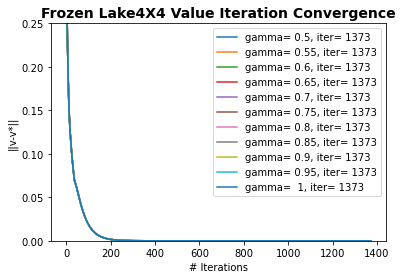

In [62]:
environment  = 'FrozenLake-v0'
env = gym.make(environment)
env = env.unwrapped
desc = env.unwrapped.desc

env.seed(0)
np.random.seed(0)

time_array=[] #[0]*10
gamma_arr=[] #[0]*10
iters=[] #[0]*10
list_scores=[] #[0]*10

### VALUE ITERATION ###
print('VALUE ITERATION WITH FROZEN LAKE')
best_vals=[] #[0]*10
for g in np.linspace(0.5, 1, 11):
    st=time.time()
    best_value,k,valueDiff = value_iteration(env, gamma = g)
    policy = extract_policy(env,best_value, gamma = g)
    policy_score = evaluate_policy(env, policy, gamma=g, n=1000)
    gamma = g
    #plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Value Iteration) ' + 'Gamma: '+ str(gamma),policy.reshape(4,4),desc,colors_lake(),directions_lake())
    end=time.time()
    gamma_arr.append(g)
    iters.append(k)
    best_vals.append(best_value)
    list_scores.append(np.mean(policy_score))
    time_array.append(end-st)
    #print (valueDiff)
    ply.plot(valueDiff,label= 'gamma= %2.2g, iter= %3d' %(g,k))
    
ply.title('Frozen Lake4X4 Value Iteration Convergence',fontsize=14, fontweight='bold')
ply.ylabel('||v-v*||')
ply.xlabel('# Iterations')
ply.legend(loc = 'upper right')
ply.ylim([0,.25])

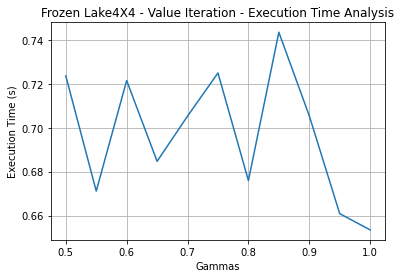

In [63]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake4X4 - Value Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

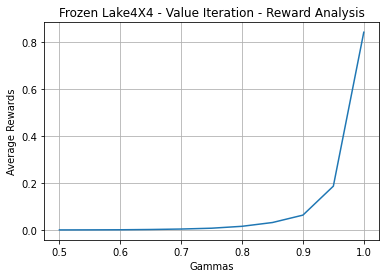

In [64]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake4X4 - Value Iteration - Reward Analysis')
plt.grid()
plt.show()

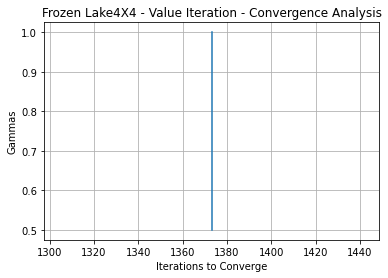

In [65]:
plt.plot(iters,gamma_arr)
plt.xlabel('Iterations to Converge')
plt.ylabel('Gammas')
plt.title('Frozen Lake4X4 - Value Iteration - Convergence Analysis')
plt.grid()
plt.show()

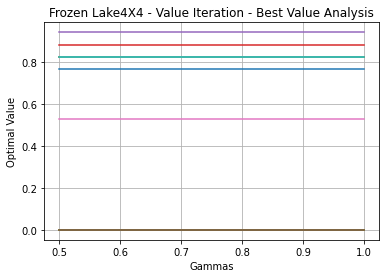

In [66]:
plt.plot(gamma_arr,best_vals)
plt.xlabel('Gammas')
plt.ylabel('Optimal Value')
plt.title('Frozen Lake4X4 - Value Iteration - Best Value Analysis')
plt.grid()
plt.show()

VALUE ITERATION WITH FROZEN LAKE
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.
Value-iteration converged at iteration# 2357.


(0.0, 0.25)

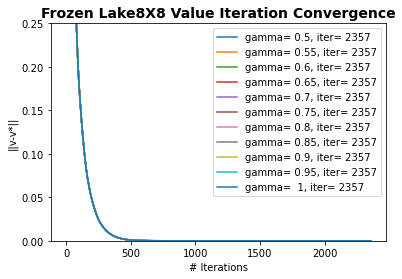

In [72]:
environment8  = 'FrozenLake8x8-v0'
env8 = gym.make(environment8)
env8 = env8.unwrapped
desc = env8.unwrapped.desc

env8.seed(0)
np.random.seed(0)

time_array=[] #[0]*10
gamma_arr=[] #[0]*10
iters=[] #[0]*10
list_scores=[] #[0]*10

### VALUE ITERATION ###
print('VALUE ITERATION WITH FROZEN LAKE')
best_vals=[] #[0]*10
for g in np.linspace(0.5, 1, 11):
    st=time.time()
    best_value,k,valueDiff = value_iteration(env8, gamma = g)
    policy = extract_policy(env8,best_value, gamma = g)
    policy_score = evaluate_policy(env8, policy, gamma=g, n=1000)
    gamma = g
    #plot = plot_policy_map('Frozen Lake Policy Map Iteration '+ str(i) + ' (Value Iteration) ' + 'Gamma: '+ str(gamma),policy.reshape(4,4),desc,colors_lake(),directions_lake())
    end=time.time()
    gamma_arr.append(g)
    iters.append(k)
    best_vals.append(best_value)
    list_scores.append(np.mean(policy_score))
    time_array.append(end-st)
    #print (valueDiff)
    ply.plot(valueDiff,label= 'gamma= %2.2g, iter= %3d' %(g,k))
    
ply.title('Frozen Lake8X8 Value Iteration Convergence',fontsize=14, fontweight='bold')
ply.ylabel('||v-v*||')
ply.xlabel('# Iterations')
ply.legend(loc = 'upper right')
ply.ylim([0,.25])

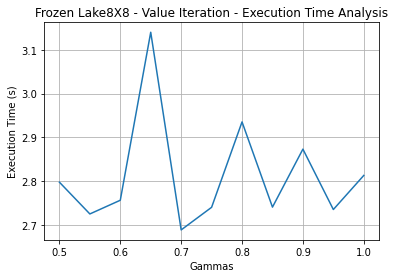

In [73]:
plt.plot(gamma_arr, time_array)
plt.xlabel('Gammas')
plt.title('Frozen Lake8X8 - Value Iteration - Execution Time Analysis')
plt.ylabel('Execution Time (s)')
plt.grid()
plt.show()

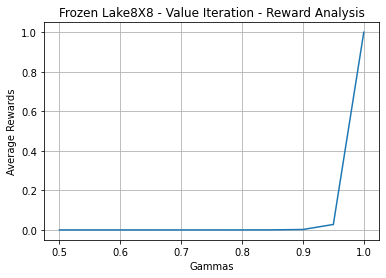

In [74]:
plt.plot(gamma_arr,list_scores)
plt.xlabel('Gammas')
plt.ylabel('Average Rewards')
plt.title('Frozen Lake8X8 - Value Iteration - Reward Analysis')
plt.grid()
plt.show()

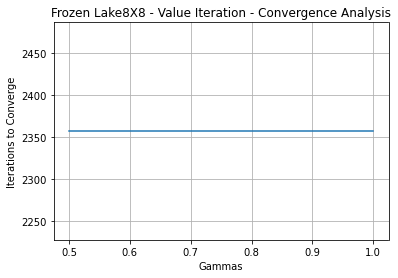

In [75]:
plt.plot(gamma_arr,iters)
plt.xlabel('Gammas')
plt.ylabel('Iterations to Converge')
plt.title('Frozen Lake8X8 - Value Iteration - Convergence Analysis')
plt.grid()
plt.show()

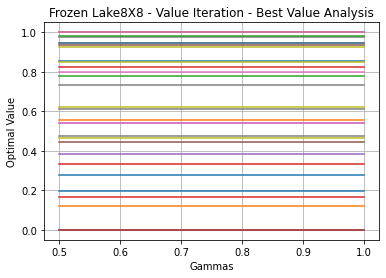

In [76]:
plt.plot(gamma_arr,best_vals)
plt.xlabel('Gammas')
plt.ylabel('Optimal Value')
plt.title('Frozen Lake8X8 - Value Iteration - Best Value Analysis')
plt.grid()
plt.show()